In [1]:
"""
Murilo Farias CT1004837

My dataset has:

VisitDuration, time (in seconds) a customer spends on the website,
PagesVisited, number of pages visited during the session,
ItemsViewed, number of items viewed during the session,
DeviceType, 0 for desktop, 1 for mobile,
AdClicks, number of ads clicked during the session,
CartAdds, number of items added to cart during the session,
Age, customer age,
Gender, 0 for women, 1 for men,
Loc_Burnaby, 0/1 location flag,
Loc_Downtown, 0/1 location flag,
Loc_Kitsilano, 0/1 location flag,
Loc_New Westminster, 0/1 location flag,
Loc_Surrey, 0/1 location flag,
Purchase 0 for no purchase, 1 for purchase.

I would choose 3 scenarios:
    1 Predict if a customer will purchase (0) or will not purchase (1) - Logistic model
        My features will be: VisitDuration, PagesVisited, ItemsViewed, AdClicks, CartAdds and Age
        My label will be: Purchase (0 no purchase, 1 purchase)
    
    2 Predict the numbers of CartAdds - Linear Regression model
        My features will be: VisitDuration, PagesVisited, ItemsViewed, AdClicks, DeviceType, Gender
        My label will be: CartAdds (number of items added to cart during the session)
    
    3 And to have something visual I would use Decision Tree
        My fatyres will be all colums: VisitDuration, PagesVisited, ItemsViewed, Purchase, AdClicks, CartAdds, Age, Gender, Loc_Burnaby, Loc_Downtown, Loc_Kitsilano, Loc_New Westminster, Loc_Surrey
        Mu label:  DeviceType (0 desktop, 1 mobile)
    
"""

'\nMurilo Farias CT1004837\n\nMy dataset has:\n\nVisitDuration, time (in seconds) a customer spends on the website,\nPagesVisited, number of pages visited during the session,\nItemsViewed, number of items viewed during the session,\nDeviceType, 0 for desktop, 1 for mobile,\nAdClicks, number of ads clicked during the session,\nCartAdds, number of items added to cart during the session,\nAge, customer age,\nGender, 0 for women, 1 for men,\nLoc_Burnaby, 0/1 location flag,\nLoc_Downtown, 0/1 location flag,\nLoc_Kitsilano, 0/1 location flag,\nLoc_New Westminster, 0/1 location flag,\nLoc_Surrey, 0/1 location flag,\nPurchase 0 for no purchase, 1 for purchase.\n\nI would choose 3 scenarios:\n    1 Predict if a customer will purchase (0) or will not purchase (1) - Logistic model\n        My features will be: VisitDuration, PagesVisited, ItemsViewed, AdClicks, CartAdds and Age\n        My label will be: Purchase (0 no purchase, 1 purchase)\n    \n    2 Predict the numbers of CartAdds - Linear Re

In [2]:
""""

LOGISTIC MODEL
    1 Predict if a customer will purchase (0) or will not purchase (1) - Logistic model
        My features will be: VisitDuration, PagesVisited, ItemsViewed, AdClicks, CartAdds and Age
        My label will be: Purchase (0 no purchase, 1 purchase)

"""


'"\n\nLOGISTIC MODEL\n    1 Predict if a customer will purchase (0) or will not purchase (1) - Logistic model\n        My features will be: VisitDuration, PagesVisited, ItemsViewed, AdClicks, CartAdds and Age\n        My label will be: Purchase (0 no purchase, 1 purchase)\n\n'

In [3]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 1) Load data
df = pd.read_csv(r"C:\Users\MuriloFarias\Desktop\GitHub\Python\CLASSE_DEA109\Assignment\vancouver_shopping_dataset.csv")

X = df[["VisitDuration", "PagesVisited", "ItemsViewed", "AdClicks", "CartAdds", "Age"]]
y = df['Purchase']

# 3) Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4) Add constant for Logit
X_train_const = sm.add_constant(X_train)
X_test_const  = sm.add_constant(X_test)

# 5) Fit model
logit_model = sm.Logit(y_train, X_train_const).fit()
print(logit_model.summary())

# 6) Predict on test
y_prob = logit_model.predict(X_test_const)
y_pred = (y_prob >= 0.5) #If probability ≥ 0.5 → predict class 1

# 7) Metrics
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

print(y_prob)
print(y_pred)

         Current function value: 0.037980
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Purchase   No. Observations:                 1600
Model:                          Logit   Df Residuals:                     1593
Method:                           MLE   Df Model:                            6
Date:                Sun, 28 Sep 2025   Pseudo R-squ.:                  0.7087
Time:                        12:47:42   Log-Likelihood:                -60.768
converged:                      False   LL-Null:                       -208.59
Covariance Type:            nonrobust   LLR p-value:                 7.002e-61
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -7.0423      1.373     -5.128      0.000      -9.734      -4.351
VisitDuration     4.2137      0.928      4.541      0.00

c:\Users\MuriloFarias\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [4]:
"""
Confusion matrix:
 [[  5   5] 
 [  4 386]]

 TN (True Negatives) = 5 → 5 cases where the true label was 0 (no purchase) and the model correctly predicted 0
 FP (False Positives) = 5 → 5 cases where the true label was 0 but the model predicted 1
 FN (False Negatives) = 4 → 4 cases where the true label was 1 but the model predicted 0.
 TP (True Positives) = 386 → 386 cases where the true label was 1 (purchase) and the model predicted 1

"""

'\nConfusion matrix:\n [[  5   5] \n [  4 386]]\n\n TN (True Negatives) = 5 → 5 cases where the true label was 0 (no purchase) and the model correctly predicted 0\n FP (False Positives) = 5 → 5 cases where the true label was 0 but the model predicted 1\n FN (False Negatives) = 4 → 4 cases where the true label was 1 but the model predicted 0.\n TP (True Positives) = 386 → 386 cases where the true label was 1 (purchase) and the model predicted 1\n\n'

In [5]:
"""
MULTIPLE LINEAR REGRESSION

    2 Predict the numbers of CartAdds - Linear Regression model
        My features will be: VisitDuration, PagesVisited, ItemsViewed, AdClicks, DeviceType, Gender
        My label will be: CartAdds (number of items added to cart during the session)
"""    


'\nMULTIPLE LINEAR REGRESSION\n\n    2 Predict the numbers of CartAdds - Linear Regression model\n        My features will be: VisitDuration, PagesVisited, ItemsViewed, AdClicks, DeviceType, Gender\n        My label will be: CartAdds (number of items added to cart during the session)\n'

In [6]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [7]:

# 1) Load data
df = pd.read_csv(r"C:\Users\MuriloFarias\Desktop\GitHub\Python\CLASSE_DEA109\Assignment\vancouver_shopping_dataset.csv")

X = df[["VisitDuration", "PagesVisited", "ItemsViewed", "AdClicks", "DeviceType", "Gender"]]
y = df['CartAdds']

# 3) Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4) Add constant for OLS
X_train_const = sm.add_constant(X_train)
X_test_const  = sm.add_constant(X_test)

# 5) Fit model
model = sm.OLS(y_train, X_train_const).fit()

# 6) Predict on test set
y_pred = model.predict(X_test_const)

# 7) Show results
print(model.summary())
print("\nFirst predictions on test set:\n", y_pred.head())
print("\nR²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

                            OLS Regression Results                            
Dep. Variable:               CartAdds   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.134
Date:                Sun, 28 Sep 2025   Prob (F-statistic):              0.340
Time:                        12:47:43   Log-Likelihood:                -2407.2
No. Observations:                1600   AIC:                             4828.
Df Residuals:                    1593   BIC:                             4866.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4421      0.104     13.875

KNN

In [8]:

""""
DECISION TREE

    
    3 And to have something visual I would use Decision Tree
        My fatyres will be all colums: VisitDuration, PagesVisited, ItemsViewed, Purchase, AdClicks, CartAdds, Age, Gender, Loc_Burnaby, Loc_Downtown, Loc_Kitsilano, Loc_New Westminster, Loc_Surrey
        Mu label:  DeviceType (0 desktop, 1 mobile)


"""

'"\nDECISION TREE\n\n    \n    3 And to have something visual I would use Decision Tree\n        My fatyres will be all colums: VisitDuration, PagesVisited, ItemsViewed, Purchase, AdClicks, CartAdds, Age, Gender, Loc_Burnaby, Loc_Downtown, Loc_Kitsilano, Loc_New Westminster, Loc_Surrey\n        Mu label:  DeviceType (0 desktop, 1 mobile)\n\n\n'

Accuracy: 0.485

Classification report:
               precision    recall  f1-score   support

           0       0.43      0.14      0.21       197
           1       0.50      0.82      0.62       203

    accuracy                           0.48       400
   macro avg       0.46      0.48      0.41       400
weighted avg       0.46      0.48      0.42       400

Confusion matrix:
 [[ 27 170]
 [ 36 167]]


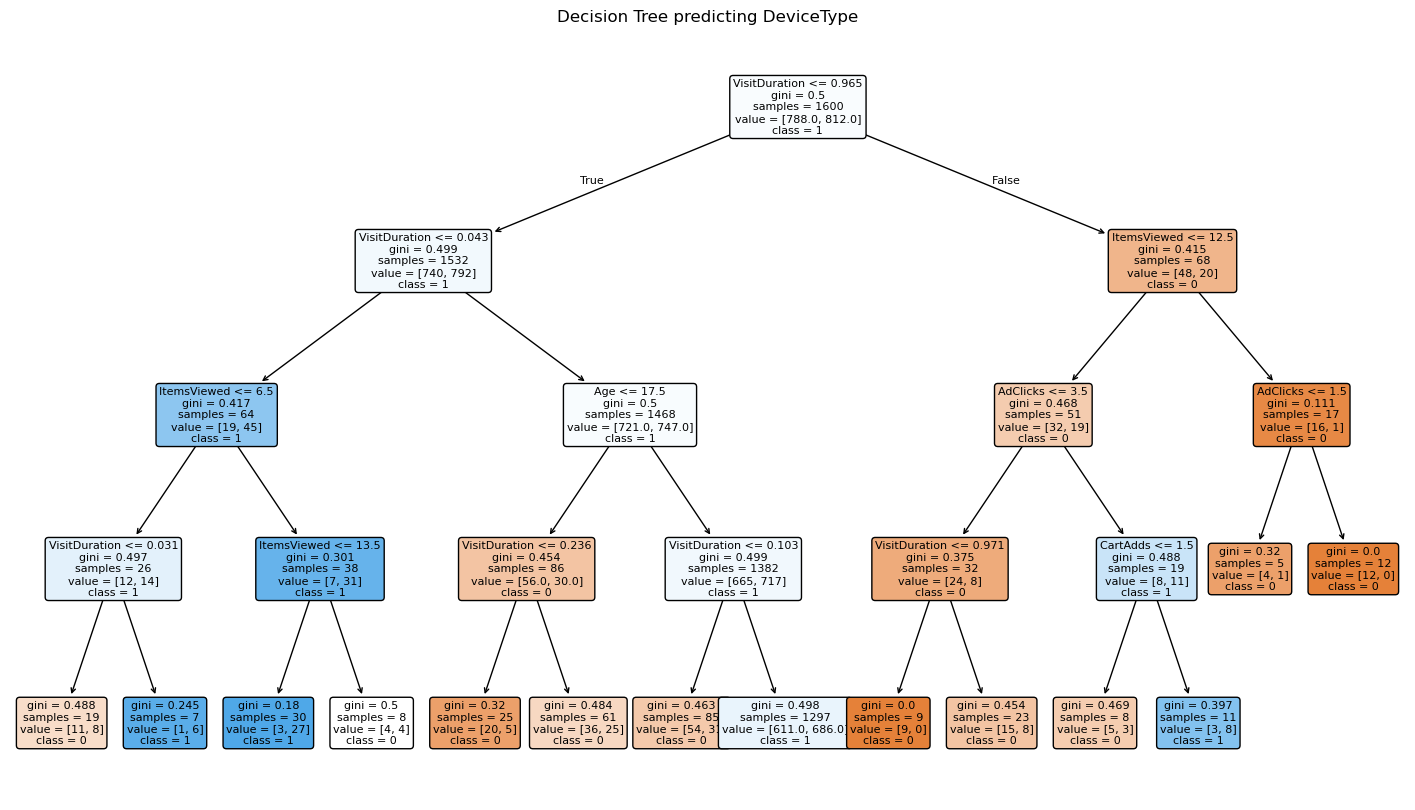

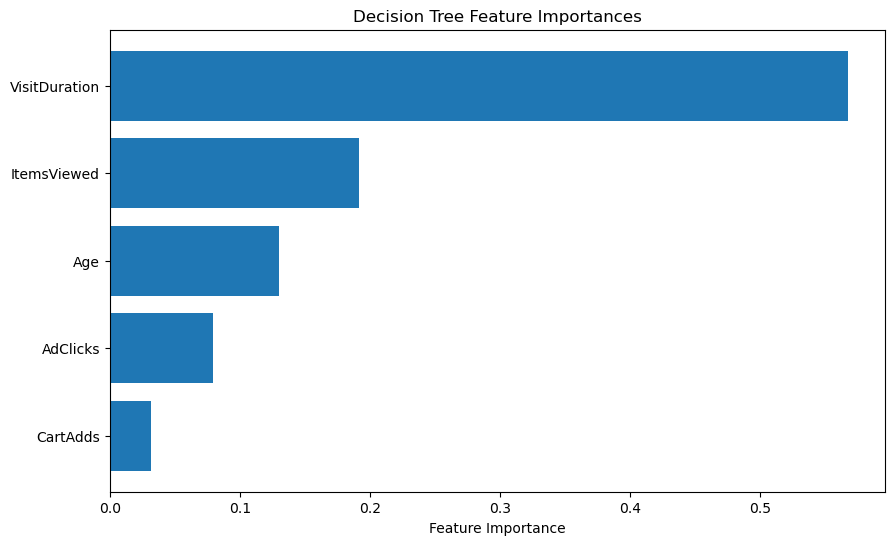

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1) Load data
df = pd.read_csv(r"C:\Users\MuriloFarias\Desktop\GitHub\Python\CLASSE_DEA109\Assignment\vancouver_shopping_dataset.csv")
feature_cols = ["VisitDuration", "ItemsViewed", "AdClicks", "CartAdds", "Age"]
X = df[feature_cols]
y = df["DeviceType"]

# 3) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4) Decision Tree
clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,          # keeps the tree readable
    min_samples_leaf=5,
    random_state=42
)
clf.fit(X_train, y_train)

# 5) Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification report:\n", classification_report(y_test, y_pred))

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# 6) Visualize tree
plt.figure(figsize=(18, 10))
plot_tree(
    clf,
    feature_names=feature_cols,
    class_names=[str(c) for c in np.unique(y_train)],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree predicting DeviceType")
plt.show()


# 7) Feature importance chart
importances = clf.feature_importances_
order = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.barh(range(len(order)), importances[order])
plt.yticks(range(len(order)), [feature_cols[i] for i in order])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importances")
plt.gca().invert_yaxis()
plt.show()

In [10]:
""" 

Confusion matrix:
 [[ 27 170]
 [ 36 167]]

[[TN  FP]
 [FN  TP]]

 TN (True Negatives) = 27 → 27 times the true class was 0 and the model correctly predicted 0
 FP (False Positives) = 170 → 170 times the true class was 0 but the model predicted 1
 FN (False Negatives) = 36 → 36 times the true class was 1 but the model predicted 0
 TP (True Positives) = 167 → 167 times the true class was 1 and the model predicted 1


"""

' \n\nConfusion matrix:\n [[ 27 170]\n [ 36 167]]\n\n[[TN  FP]\n [FN  TP]]\n\n TN (True Negatives) = 27 → 27 times the true class was 0 and the model correctly predicted 0\n FP (False Positives) = 170 → 170 times the true class was 0 but the model predicted 1\n FN (False Negatives) = 36 → 36 times the true class was 1 but the model predicted 0\n TP (True Positives) = 167 → 167 times the true class was 1 and the model predicted 1\n\n\n'